# Data pre-proceesing for arabic dialect classification

### Introduction
The data preprocessing is one of the most crucial steps in the machine learning process, here I will explain my preprocessing steps 

## Data import 

In [36]:
# Create path to input files
import os

inputs_path = os.path.abspath('../inputs/')

In [37]:
import pandas as pd

dialects_data = pd.read_csv(inputs_path + '/dialcets_data.csv')
dialects_data.head()

,id,tweet,dialect
0,1.175360e+18,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1.175420e+18,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1.175450e+18,@KanaanRema مبين من كلامه خليجي,IQ
3,1.175470e+18,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1.175500e+18,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


### Dataset balance visualization

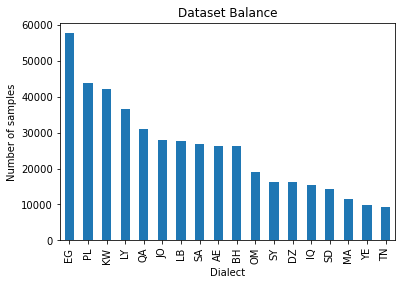

In [38]:
import matplotlib.pyplot as plt
classes_num = dialects_data['dialect'].value_counts().plot(kind = 'bar',
                                                          title = 'Dataset Balance',
                                                          xlabel = 'Dialect',
                                                          ylabel = 'Number of samples')

In [39]:
# Merge gulf dialcets
dialects_data['dialect'].replace(['SA', 'AE', 'QA', 'BH', 'KW', 'OM', 'IQ'], 'GUL', inplace=True)
# Merge noth african countries (Except for egyptyian)
dialects_data['dialect'].replace(['LIB', 'DZ', 'MA', 'TN', 'LY'], 'NA', inplace=True)
# Merge Levantine countries
dialects_data['dialect'].replace(['SY', 'PL', 'JO', 'LB'], 'LV', inplace=True)

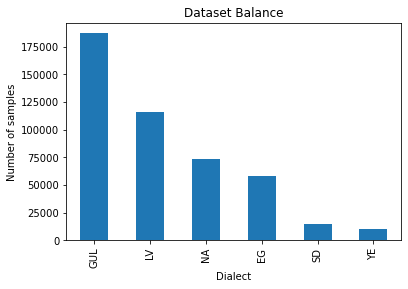

In [40]:
classes_num = dialects_data['dialect'].value_counts().plot(kind = 'bar',
                                                          title = 'Dataset Balance',
                                                          xlabel = 'Dialect',
                                                          ylabel = 'Number of samples')

## Data pre-processing 
### Drop uncessary features 
Remove IDs column from the data because it is not useful going forward.

In [41]:
dialects_data.drop('id', axis = 1, inplace = True)
dialects_data.head(1)

,tweet,dialect
0,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,GUL


### Merge similar dilacets

### Undersampling 

In [42]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy={'GUL': 50000, 'LV': 50000, 'EG': 50000, 'NA': 50000})
X_under, y_under = undersample.fit_resample(dialects_data['tweet'].values.reshape(-1, 1), dialects_data['dialect'])

In [43]:
X_under = pd.Series(X_under.ravel())

In [44]:
#Create new dataframe to house under sampled data
under_sampled_data = pd.concat([X_under, y_under], axis = 1)
under_sampled_data.rename(columns={0: 'tweet'}, inplace = True)
display(under_sampled_data.head())

,tweet,dialect
0,#اليمين_الدستوريه بالنسبه للفتاه الفلسطينية ال...,EG
1,جتكم نيله..ده كان بيدافع عن مرسي الله يرحمه ال...,EG
2,@AsmaAhm63626594 تسلمى اختى 🙏\nاهوه قاعد مصدع ...,EG
3,وكلنها ولعة اكبر سوق للكتب تقريبا في مصر كتب ...,EG
4,@elsyed196 @ykWkCMc8RQYWvPi الله يخرب بيوت الخ...,EG


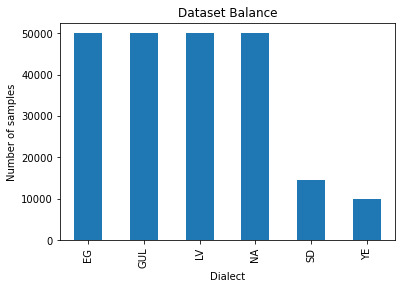

In [45]:
classes_num = under_sampled_data['dialect'].value_counts().plot(kind = 'bar',
                                                          title = 'Dataset Balance',
                                                          xlabel = 'Dialect',
                                                          ylabel = 'Number of samples')

### Drop minority classes

In [46]:
under_sampled_data.drop(under_sampled_data.loc[under_sampled_data['dialect']=='YE'].index, inplace=True)
#under_sampled_data.drop(under_sampled_data.loc[under_sampled_data['dialect']=='IQ'].index, inplace=True)
under_sampled_data.drop(under_sampled_data.loc[under_sampled_data['dialect']=='SD'].index, inplace=True)

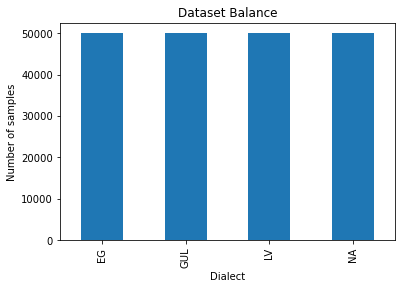

In [47]:
classes_num = under_sampled_data['dialect'].value_counts().plot(kind = 'bar',
                                                          title = 'Dataset Balance',
                                                          xlabel = 'Dialect',
                                                          ylabel = 'Number of samples')

### Remove unwanted characters

In [48]:
import re
def preprocess_text(tweet):
    #tweet = re.sub('/#\w+\s*[A-Za-z]+\b','',tweet) # Remove hashtags
    tweet = re.sub('@[^\s]+','',tweet) # Remove user name and mentions
    tweet = re.sub('http[^\s]+','',tweet) # Remove Hyper links
    tweet = re.sub('[^\w\s#@/:%.,_-]','',tweet) # Remove emojis
    tweet = re.sub('\d+','',tweet) # Remove numbers
    tweet = re.sub('[^\w\s]','',tweet) # Remove punctuation
    tweet = re.sub(r'[a-zA-Z]','',tweet, flags=re.I) # Remove english words and add flag to remove dotlees i
    tweet = re.sub(r'[\_-]', '', tweet) # Remove underscores and dashes
    tweet = re.sub(r'\n', '', tweet)
    tweet = tweet.rstrip()
    return tweet

In [49]:
under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(preprocess_text)

In [50]:
under_sampled_data.head()

,tweet,dialect
0,اليمينالدستوريه بالنسبه للفتاه الفلسطينية اللي...,EG
1,جتكم نيلهده كان بيدافع عن مرسي الله يرحمه اللي...,EG
2,تسلمى اختى اهوه قاعد مصدع الناس على تويتر,EG
3,وكلنها ولعة اكبر سوق للكتب تقريبا في مصر كتب ...,EG
4,الله يخرب بيوت الخرفان,EG


### Normalize

In [51]:
#library for text normalization
import tashaphyne.normalize as normalize
def normalizeArabic(tweet):
    return normalize.normalize_searchtext(tweet)

In [52]:
under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(normalizeArabic)
print(under_sampled_data['tweet'].loc[0:5])

0    اليمينالدستوريه بالنسبه للفتاه الفلسطينيه اللي...
1    جتكم نيلهده كان بيدافع عن مرسي الله يرحمه اللي...
2            تسلمي اختي اهوه قاعد مصدع الناس علي تويتر
3    وكلنها ولعه اكبر سوق للكتب تقريبا في مصر  كتب ...
4                               الله يخرب بيوت الخرفان
5    مش عارف ليه افتكرت جمله ايجيبشن هايبوسني في مس...
Name: tweet, dtype: object


### Remove names from tweets using names scraped by ZakAhmed
Link to ZakAhmed's GitHub repository: https://github.com/zakahmad/ArabicNameGenderFinder

In [53]:
# Gather Names from local documents
arabic_names = pd.read_csv('names_stopwords/arabic_names.csv', encoding = 'utf-8')
# drop gender column
arabic_names.drop('Gender', axis = 1, inplace = True)
names_list = arabic_names.values.ravel()
# Get list of stopwords from txt file
with open('names_stopwords/arabic_names.txt', 'r', encoding="utf8") as file:
    names = set(file.read().split())

# Join list form csv and txt files
joint_names_list = names.union(names_list)

In [54]:
# Remove names from tweets
under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in joint_names_list]))

In [55]:
under_sampled_data.head()

,tweet,dialect
0,اليمينالدستوريه بالنسبه للفتاه الفلسطينيه اللي...,EG
1,جتكم نيلهده كان بيدافع عن مرسي يرحمه اللي بغبا...,EG
2,تسلمي اختي اهوه قاعد مصدع الناس علي,EG
3,وكلنها ولعه اكبر سوق للكتب تقريبا في كتب اللبن...,EG
4,يخرب بيوت الخرفان,EG


### Stop words removal
Additional stopwords was added based on the results from TF-IDF vectorizer below.

In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/omary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:

with open('names_stopwords/arabic_stopwords.txt', 'r', encoding="utf8") as file:
    stopwords = file.read().split()
# Create stop words list by joining nltk stopwords with my own.
arab_stopwords = set(nltk.corpus.stopwords.words("arabic"))
joint_stop_words = arab_stopwords.union(stopwords)

In [58]:
under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (joint_stop_words)]))

In [59]:
under_sampled_data.head()

,tweet,dialect
0,اليمينالدستوريه بالنسبه للفتاه الفلسطينيه اللي...,EG
1,جتكم نيلهده بيدافع مرسي يرحمه اللي بغباءكم ودي...,EG
2,تسلمي اختي اهوه قاعد مصدع الناس,EG
3,وكلنها ولعه اكبر سوق للكتب تقريبا كتب اللبناني...,EG
4,يخرب بيوت الخرفان,EG


### Text stemming
I opted out from using the stemmer in this task because it can lose important feautres releated to dialects

from snowballstemmer import stemmer

ar_stemmer = stemmer("arabic")

def stemmer(tweet):
    newtweet = ar_stemmer.stemWord(tweet)
    return newtweet

under_sampled_data['tweet'] = under_sampled_data['tweet'].apply(stemmer)
under_sampled_data.head()

### Dialects labels encoding 

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

under_sampled_data['dialect'] = le.fit_transform(under_sampled_data['dialect'])

In [61]:
under_sampled_data.head(1)

,tweet,dialect
0,اليمينالدستوريه بالنسبه للفتاه الفلسطينيه اللي...,0


## Data split
Data spliting will occur before the utilisation of bag of words method to ensure that no data leak happens.

In [62]:
tweets = under_sampled_data['tweet']
dialect_target = under_sampled_data['dialect']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tweets, dialect_target, test_size = 0.1, random_state = 0)

### Vectorize data

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 100)
# Transform data
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train).toarray()


In [65]:
tfidf_vectorizer.get_feature_names_out()

array(['احلي', 'احنا', 'اخر', 'اصلا', 'اكتر', 'اكيد', 'ال', 'الخير',
       'الدنيا', 'الشعب', 'العالم', 'الكلام', 'اللي', 'الموضوع', 'الناس',
       'الواحد', 'انت', 'انتي', 'انك', 'انو', 'اني', 'ايه', 'بالله',
       'بدون', 'بقي', 'بكل', 'تاني', 'حاجه', 'حتي', 'حد', 'حدا', 'حق',
       'حلوه', 'خلاص', 'دا', 'ده', 'دول', 'دي', 'ربنا', 'ربي', 'رح',
       'زمان', 'زي', 'سنه', 'شاء', 'شخص', 'شنو', 'شو', 'شويه', 'شي', 'صح',
       'طبعا', 'طول', 'عشان', 'علشان', 'علينا', 'عليهم', 'عم', 'عندك',
       'عندنا', 'عنده', 'عندي', 'فعلا', 'فيك', 'فيهم', 'قلبي', 'كتير',
       'كده', 'كلام', 'كله', 'كلها', 'كمان', 'كنت', 'لازم', 'لان', 'لانه',
       'لسه', 'ليش', 'ليه', 'مره', 'ممكن', 'منك', 'منهم', 'مو', 'مين',
       'ناس', 'نفسي', 'هيك', 'والله', 'واللي', 'وانا', 'وانت', 'وحده',
       'وش', 'وقت', 'وكل', 'وين', 'يارب', 'يعني', 'يقول'], dtype=object)

In [66]:
X_train_tfidf.shape[1]

100

### Vectorize test data

In [67]:
X_test_tfidf = tfidf_vectorizer.transform(x_test).toarray()